In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\amaan\Downloads\seattle-weather.csv")

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.shape

(1461, 6)

In [6]:
df.isnull().sum()
#there is no null value in our data set

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [8]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

array([[<AxesSubplot:title={'center':'precipitation'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'wind'}>]], dtype=object)

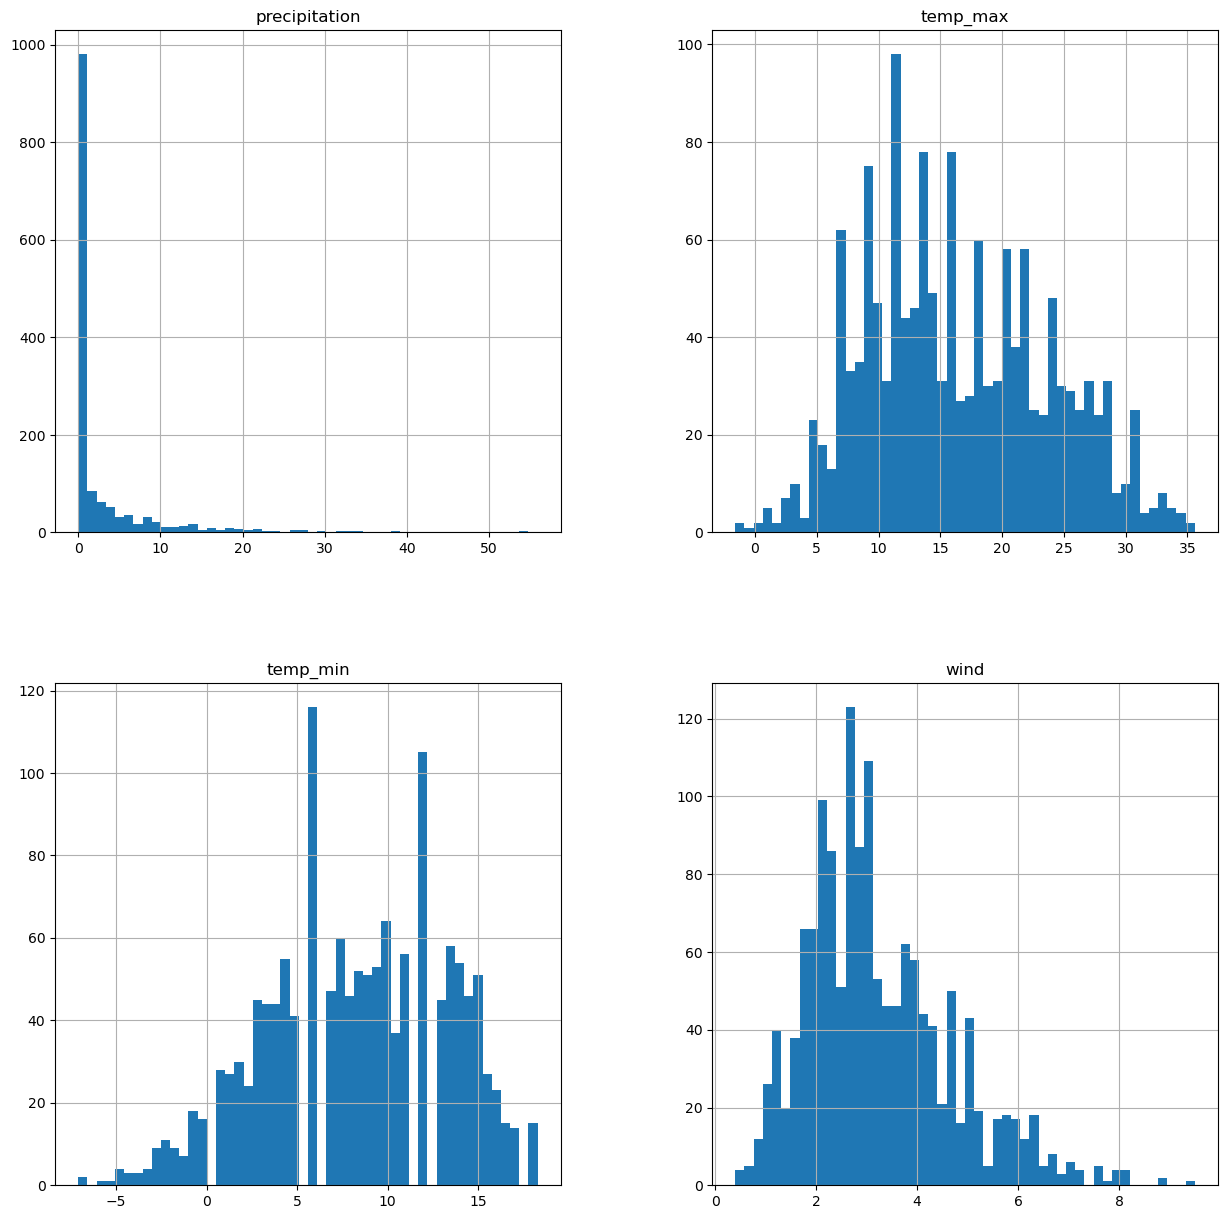

In [9]:
# visualizing data set
df.hist(bins=50, figsize=(15,15))

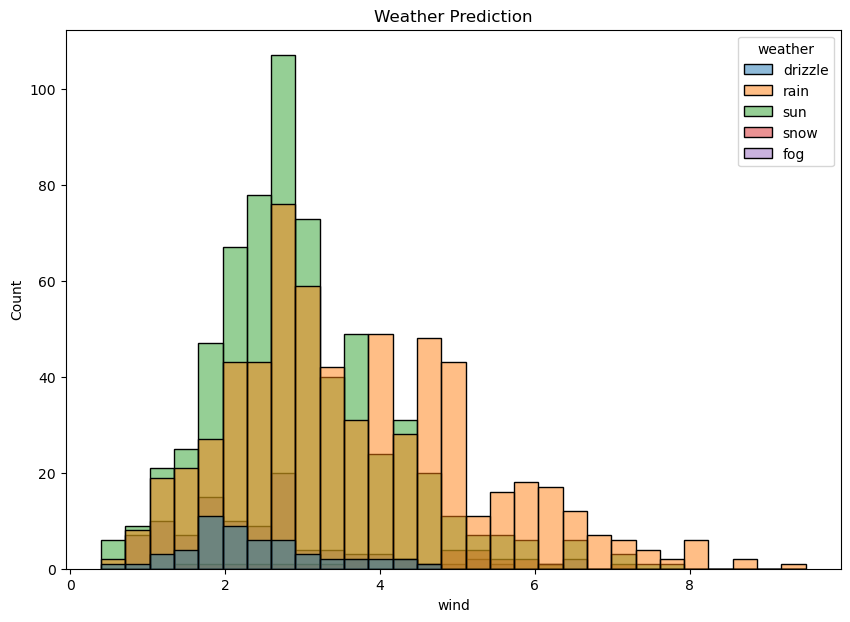

In [10]:
plt.figure(figsize=(10,7))
plt.title('Weather Prediction')
sns.histplot(x='wind',hue='weather',data=df, )
plt.show()

In [11]:
# dividing data into train and test to make prediction
x = df[['precipitation','temp_max','temp_min','wind']]
y = df['weather']
# x is features and y is target

In [12]:
#Train and test the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [13]:
# Using K-Neighbors
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7585421412300684

In [14]:
#predicting the wheather
ypred=knn.predict(x_test)
ypred

array(['sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'fog', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'fog', 'rain', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'fog', 'sun', 'rain',
       'rain', 'rain', 'fog', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'fog',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'fog', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain',
       'fog', 'rain', 'rain', 'fog', 'rain', 'rain', 'sun', 'drizzle',
       'fog', 'rain', 'rain', 'rain', 'rai

In [15]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

     drizzle       0.07      0.14      0.10         7
         fog       0.12      0.17      0.15        23
        rain       0.86      0.89      0.88       187
        snow       0.12      1.00      0.22         1
         sun       0.83      0.73      0.78       221

    accuracy                           0.76       439
   macro avg       0.40      0.59      0.42       439
weighted avg       0.80      0.76      0.77       439



In [17]:
# SVM Classification 
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.7722095671981777

In [20]:
#predicting the wheather
ypred=svm.predict(x_test)
ypred

array(['sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain',
       'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 's

In [21]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         0
         fog       0.00      0.00      0.00         0
        rain       0.80      0.90      0.85       171
        snow       0.00      0.00      0.00         0
         sun       0.96      0.69      0.80       268

    accuracy                           0.77       439
   macro avg       0.35      0.32      0.33       439
weighted avg       0.90      0.77      0.82       439



In [26]:
# Take a input and make prediction.
input=[[20.5,12.8,5,4.7]]
ot=svm.predict(input)
print("The weather Would be:" ,end=" ")
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('Fogg')
elif (ot==2):
  print('Rain')
elif (ot==3):
  print('Snow')
else:
  print('Sun')


The weather Would be: Sun
